# Media Frames Corpus (MFC) Analysis

In this notebook the process the Media Frames Corpus (MFC) is analyzed.

In [1]:
import json

# read frames
with open("../../data/mfc/codes.json") as f:
    codes = json.load(f)

In [2]:
def get_frame_name(code):
    if code == None:
        return "Other"
    
    if "." not in str(code):
        return codes[str(code) + ".2"].replace(" primary", "").replace(" primany", "")
    return codes[str(code)].replace(" primary", "").replace(" primany", "")

def get_tone_name(code):
    if code == None:
        return "Neutral"
    if str(code) == "17":
        return "Pro"
    elif str(code) == "18":
        return "Neutral"
    elif str(code) == "19":
        return "Anti"
    else:
        return codes[str(code)]


In [3]:
# load json file as df from ../../data/mfc/immigration_labeled_preprocessed.json
import pandas as pd

df = pd.read_json('../../data/mfc/immigration_labeled.json')
df = df.T

# drop annotations column
df.drop(columns=['annotations'], inplace=True)

# replace primary_frame with get_frame_name(primary_frame)
df['primary_frame'] = df['primary_frame'].apply(get_frame_name)

# replace tone with get_tone_name(tone)
df['primary_tone'] = df['primary_tone'].apply(get_tone_name)

In [13]:
import re

def preprocess_text(text):
    text = text.replace("\n\n", ". ")
    text = text.replace(".. ", ". ")
    #text = text.replace("\t", " ")
    text = text.replace("  ", " ")
    text = text.strip()

    # some texts start with "IMM-XXXXX PRIMARY" remove
    text = re.sub(r"^IMM-\d+. PRIMARY. ", "", text)

    # remove leading and trailing whitespaces
    text = text.strip()

    return text


In [14]:
df['text'] = df['text'].apply(preprocess_text)

In [15]:
df.head()

,headline_frame,irrelevant,primary_frame,primary_tone,text,year,month,day,source
Immigration1.0-10005,10.1,0,Quality of Life,Pro,Immigrants without HOPE need help entering col...,2001,8,15,atlanta journal and constitution
Immigration1.0-10006,15.1,0,"Legality, Constitutionality, Jurisdiction",Anti,"Reaction to Tancredo, Lamm as predicted. When ...",2001,8,15,denver post
Immigration1.0-10013,1.1,0,Capacity and Resources,Anti,"$50,000 per entry. They learned English. I do ...",2001,8,14,herald-sun
Immigration1.0-10015,None,0,Quality of Life,Pro,Dangerous crossing; PURSUING DREAMS AND POSSIB...,2001,8,13,atlanta journal and constitution
Immigration1.0-10018,None,0,Other,Neutral,CHILDREN OF LATINO IMMIGRANTS CHOOSING TO HAVE...,2001,8,13,san jose mercury news


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

## Primary Frame Distribution

In [22]:
# Calculate distributions for "primary_frame"
frame_counts = df['primary_frame'].value_counts()
frame_percentage = df['primary_frame'].value_counts(normalize=True) * 100


# Create DataFrame for "primary_frame" distributions
frame_table = pd.DataFrame({
    "Absolute": frame_counts,
    "Relative (%)": frame_percentage
}).fillna(0)  # Fill NaN with 0 for missing values


# Print the tables
print("Primary Frame Distribution Table:")
print(frame_table)

Primary Frame Distribution Table:
                                           Absolute  Relative (%)
primary_frame                                                    
Political                                       969     14.340684
Legality, Constitutionality, Jurisdiction       957     14.163090
Other                                           834     12.342756
Crime and Punishment                            803     11.883972
Cultural Identity                               556      8.228504
Policy Presecription and Evaluation             473      7.000148
Economic                                        414      6.126979
Quality of Life                                 410      6.067782
Security and Defense                            286      4.232648
Public Sentiment                                243      3.596271
Health and Safety                               239      3.537073
Capacity and Resources                          210      3.107888
Fairness and Equality                     

## Primary Tone Distribution

In [23]:
# Calculate distributions for "primary_tone"
tone_counts = df['primary_tone'].value_counts()
tone_percentage = df['primary_tone'].value_counts(normalize=True) * 100

# Create DataFrame for "primary_tone" distributions
tone_table = pd.DataFrame({
    "Absolute": tone_counts,
    "Relative (%)": tone_percentage
}).fillna(0)  # Fill NaN with 0 for missing values

print("Primary Tone Distribution Table:")
print(tone_table)

Primary Tone Distribution Table:
              Absolute  Relative (%)
primary_tone                        
Pro               2740     40.550540
Neutral           2332     34.512358
Anti              1685     24.937102


## "primary_tone" on "primary_frame" Distribution (Absolute and Relative)

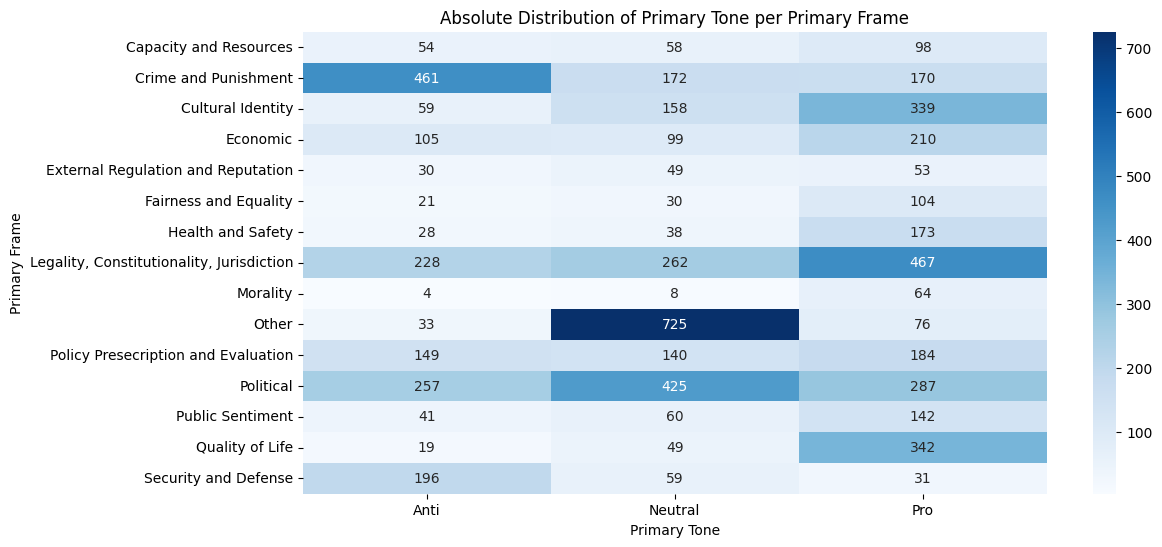

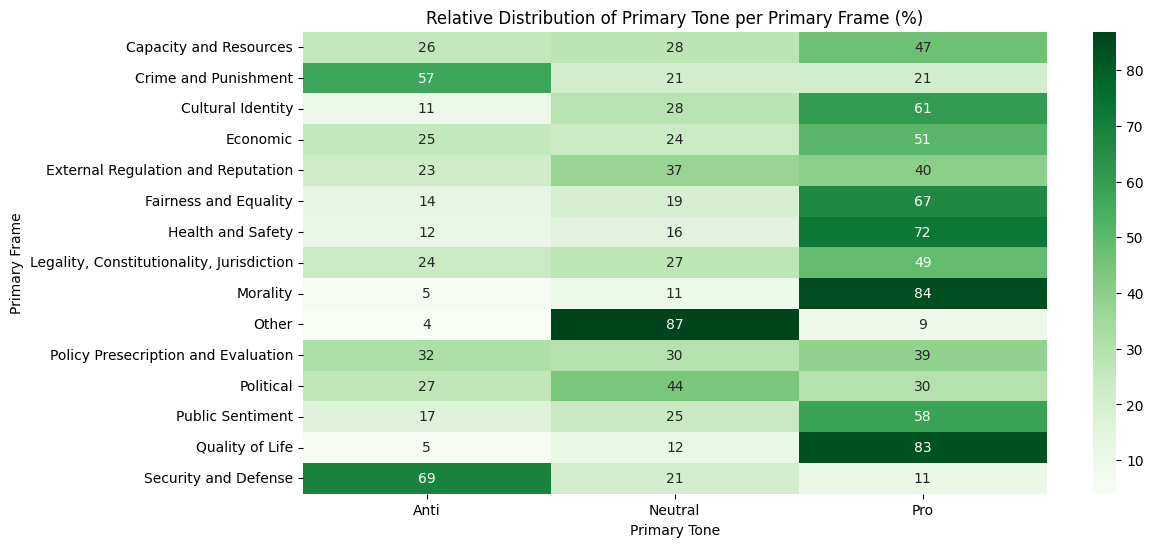

In [24]:
# Group by "primary_frame" and get the distribution of "primary_tone"
grouped = df.groupby('primary_frame')['primary_tone'].value_counts().unstack(fill_value=0)
grouped_relative = grouped.divide(grouped.sum(axis=1), axis=0) * 100

# Plot absolute distribution
plt.figure(figsize=(12, 6))
sns.heatmap(grouped, annot=True, fmt="d", cmap="Blues")
plt.title('Absolute Distribution of Primary Tone per Primary Frame')
plt.ylabel('Primary Frame')
plt.xlabel('Primary Tone')
plt.show()

# Plot relative distribution
plt.figure(figsize=(12, 6))
sns.heatmap(grouped_relative, annot=True, fmt=".0f", cmap="Greens")
plt.title('Relative Distribution of Primary Tone per Primary Frame (%)')
plt.ylabel('Primary Frame')
plt.xlabel('Primary Tone')
plt.show()

## Source against Primary Frame Distribution

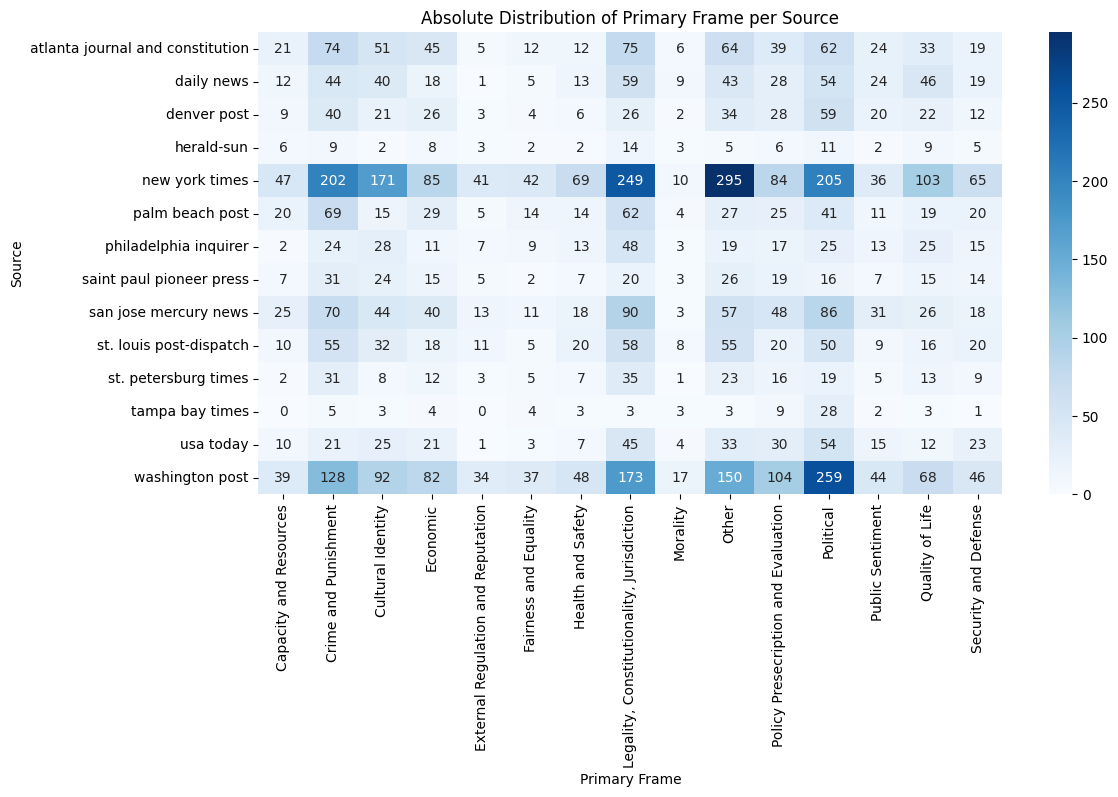

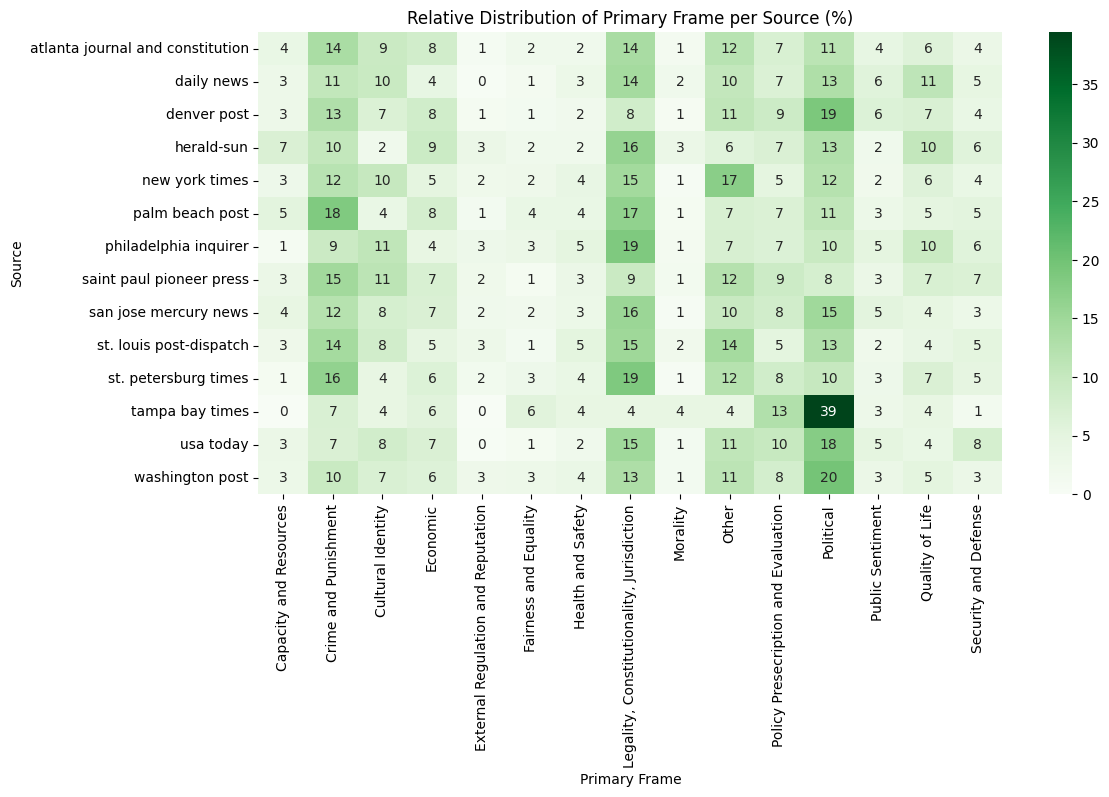

In [25]:
grouped_source = df.groupby('source')['primary_frame'].value_counts().unstack(fill_value=0)
grouped_source_relative = grouped_source.divide(grouped_source.sum(axis=1), axis=0) * 100

# Plot absolute distribution
plt.figure(figsize=(12, 6))
sns.heatmap(grouped_source, annot=True, fmt="d", cmap="Blues")
plt.title('Absolute Distribution of Primary Frame per Source')
plt.ylabel('Source')
plt.xlabel('Primary Frame')
plt.show()

# Plot relative distribution
plt.figure(figsize=(12, 6))
sns.heatmap(grouped_source_relative, annot=True, fmt=".0f", cmap="Greens")
plt.title('Relative Distribution of Primary Frame per Source (%)')
plt.ylabel('Source')
plt.xlabel('Primary Frame')
plt.show()

## Source against Tone Distribution

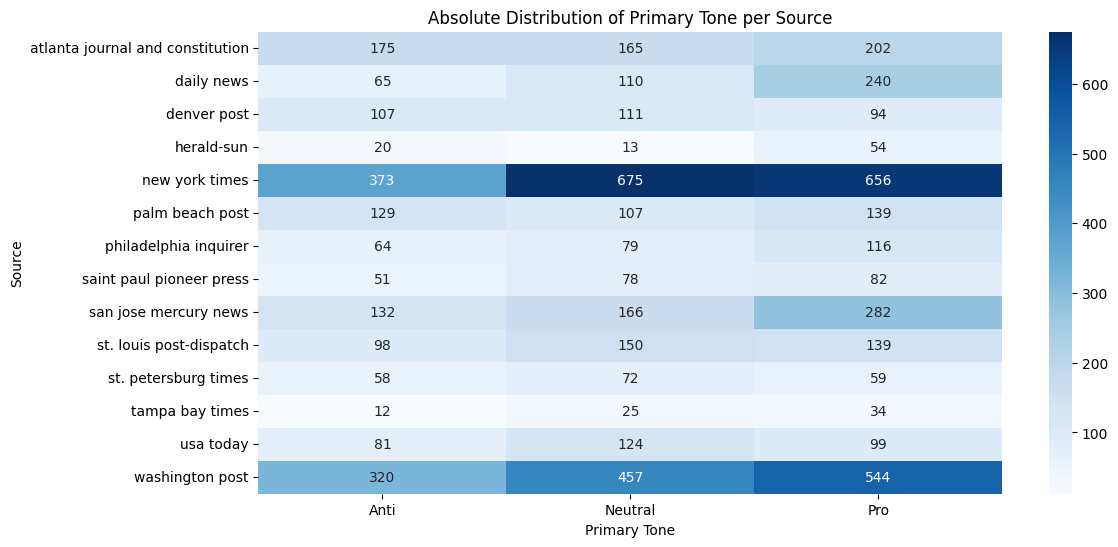

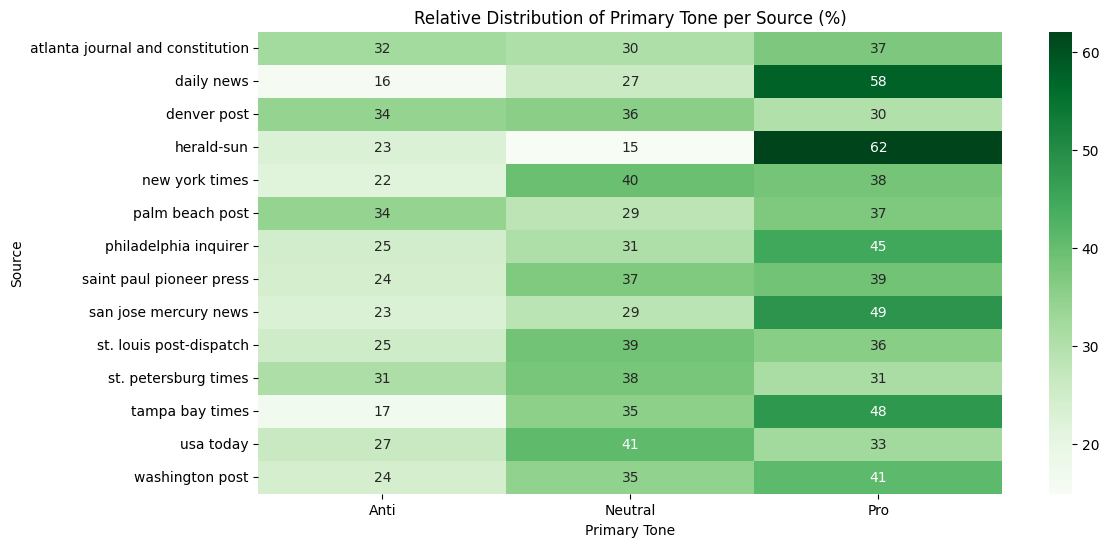

In [26]:
grouped_source_tone = df.groupby('source')['primary_tone'].value_counts().unstack(fill_value=0)
grouped_source_tone_relative = grouped_source_tone.divide(grouped_source_tone.sum(axis=1), axis=0) * 100

# Plot absolute distribution
plt.figure(figsize=(12, 6))
sns.heatmap(grouped_source_tone, annot=True, fmt="d", cmap="Blues")
plt.title('Absolute Distribution of Primary Tone per Source')
plt.ylabel('Source')
plt.xlabel('Primary Tone')
plt.show()

# Plot relative distribution
plt.figure(figsize=(12, 6))
sns.heatmap(grouped_source_tone_relative, annot=True, fmt=".0f", cmap="Greens")
plt.title('Relative Distribution of Primary Tone per Source (%)')
plt.ylabel('Source')
plt.xlabel('Primary Tone')
plt.show()

## Number of Articles

In [27]:
num_articles = len(df)
articles_table = pd.DataFrame({"Total Articles": [num_articles]})
print(articles_table)


   Total Articles
0            6757


## Articles Per Year

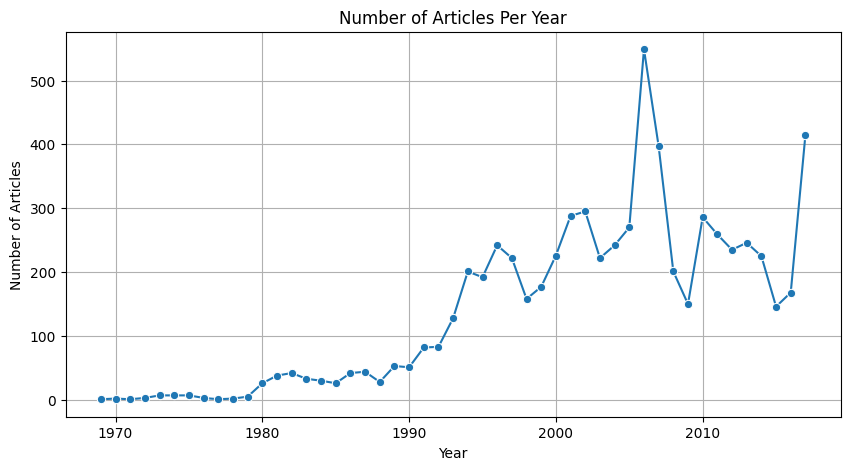

In [28]:
# Example yearly data, adjust according to your 'year' column
article_counts_per_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=article_counts_per_year.index, y=article_counts_per_year.values, marker='o')
plt.title('Number of Articles Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


## Articles Per "Source"

C:\Users\elias\AppData\Local\Temp\ipykernel_10028\2193349331.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=article_counts_per_source.values, y=article_counts_per_source.index, palette="viridis")


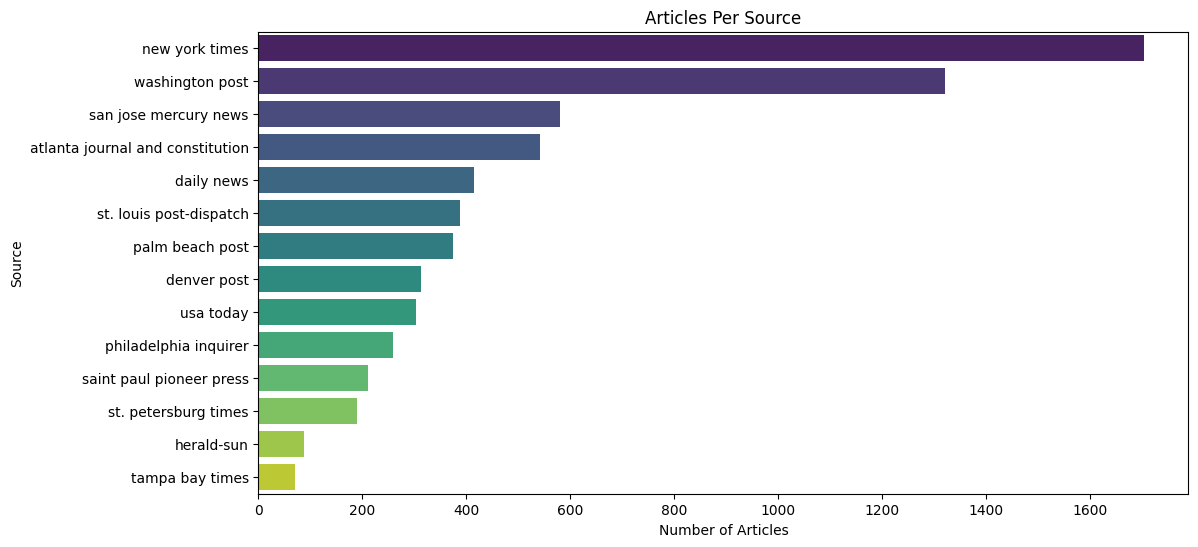

In [29]:
article_counts_per_source = df['source'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=article_counts_per_source.values, y=article_counts_per_source.index, palette="viridis")
plt.title('Articles Per Source')
plt.xlabel('Number of Articles')
plt.ylabel('Source')
plt.show()


## "Irrelevant" Articles Absolute and Relative

In [30]:
irrelevant_counts = df['irrelevant'].value_counts()
irrelevant_relative = df['irrelevant'].value_counts(normalize=True) * 100

irrelevant_table = pd.DataFrame({
    "Absolute": irrelevant_counts,
    "Relative (%)": irrelevant_relative
})
print(irrelevant_table)


            Absolute  Relative (%)
irrelevant                        
0               6097      90.91858
1                609       9.08142


## Text Length, Number of Sentences, Words/Chars per Sentence

In [31]:
import pandas as pd
import nltk
nltk.download('punkt')

# Assuming your DataFrame is named `df` and the text column is named 'text'
# Calculating text length in words and characters
df['text_length_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

# Calculating number of sentences
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

# Calculating average words per sentence
df['words_per_sentence'] = df.apply(lambda x: x['text_length_words'] / x['num_sentences'] if x['num_sentences'] > 0 else 0, axis=1)

# Descriptive statistics including quantiles
text_stats = df[['text_length_words', 'num_sentences', 'words_per_sentence']].describe(percentiles=[.25, .5, .75, .95, .99])
print(text_stats)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elias\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


       text_length_words  num_sentences  words_per_sentence
count        6757.000000    6757.000000         6757.000000
mean          284.589315      12.591831           23.815945
std            81.821854       4.876362            6.671377
min             5.000000       1.000000            5.000000
25%           271.000000      10.000000           20.090909
50%           288.000000      12.000000           23.333333
75%           307.000000      14.000000           26.818182
95%           345.000000      19.000000           33.000000
99%           409.000000      26.000000           38.460000
max          2596.000000     114.000000          183.000000


## Year to tone distribution

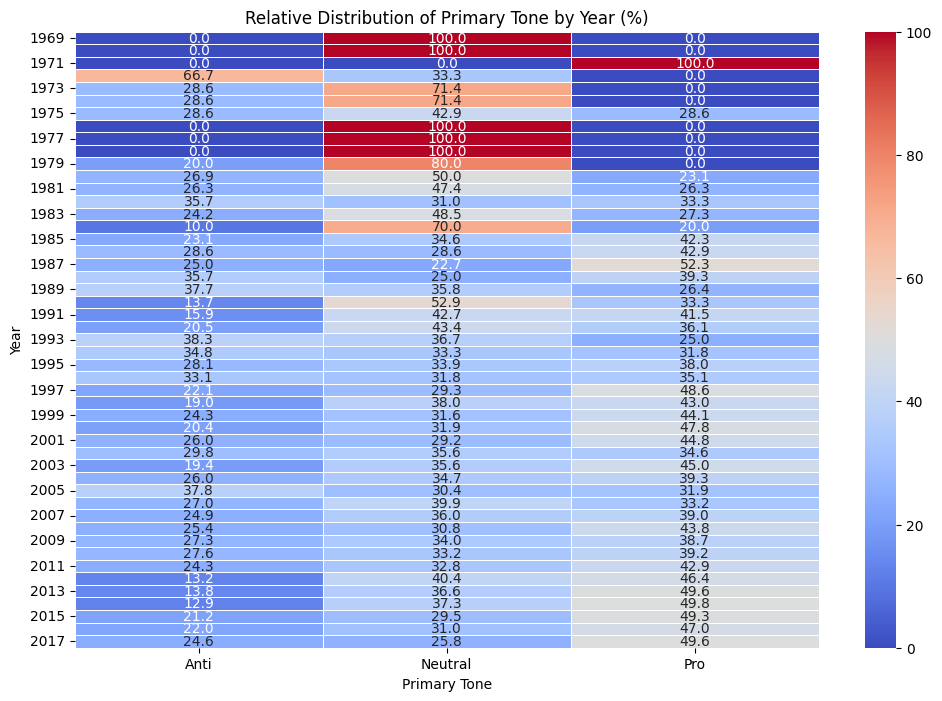

In [32]:
grouped = df.groupby(['year', 'primary_tone']).size().reset_index(name='count')

# Step 2: Normalize the counts within each year
grouped['total_per_year'] = grouped.groupby('year')['count'].transform('sum')
grouped['relative_count'] = grouped['count'] / grouped['total_per_year'] * 100

# Step 3: Create a pivot table for the heatmap
pivot_table = grouped.pivot_table(index='year', columns='primary_tone', values='relative_count', fill_value=0)

# Step 4: Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="coolwarm", linewidths=.5)
plt.title('Relative Distribution of Primary Tone by Year (%)')
plt.ylabel('Year')
plt.xlabel('Primary Tone')
plt.show()

# SRL Analysis

Analyzing the SRL data.

In [34]:
# read file from data\srls\mfc\mfc_labeled.pkl

df_srl = pd.read_pickle('../../data/srls/mfc/mfc_labeled.pkl')

In [35]:
df_srl.head()

,article_id,text,srls
0,Immigration1.0-10005,Immigrants without HOPE need help entering college.,"[{'predicate': 'need', 'ARG0': 'Immigrants without HOPE', 'ARG1': 'help entering college'}, {'predicate': 'entering', 'ARG0': 'Immigrants without HOPE', 'ARG1': 'college'}]"
1,Immigration1.0-10005,Anxiety gripped Jose Alvarado in third-period calculus class at North Atlanta High School.,"[{'predicate': 'gripped', 'ARG0': 'Anxiety', 'ARG1': 'Jose Alvarado'}]"
2,Immigration1.0-10005,It mounted as students went around the room telling Mrs. Brooks where they would go to college: Emory.,"[{'predicate': 'mounted', 'ARG0': '', 'ARG1': 'It'}, {'predicate': 'went', 'ARG0': 'students', 'ARG1': ''}, {'predicate': 'telling', 'ARG0': 'students', 'ARG1': 'where they would go to college : Emory'}, {'predicate': 'go', 'ARG0': 'they', 'ARG1': ''}]"
3,Immigration1.0-10005,Georgia Tech.,"[{'predicate': '', 'ARG0': '', 'ARG1': ''}]"
4,Immigration1.0-10005,University of Georgia.,"[{'predicate': '', 'ARG0': '', 'ARG1': ''}]"


In [37]:
# Function to count arguments in each sentence
def count_args(srls):
    count = 0
    for srl in srls:
        if srl['predicate'] and (srl['ARG0'] or srl['ARG1']):
            count += sum([1 for key in ['ARG0', 'ARG1'] if srl[key]])
    return count

# Apply the function to each row
df_srl['arg_count'] = df_srl['srls'].apply(count_args)

# Calculate descriptive statistics
statistics = df_srl['arg_count'].describe(percentiles=[.25, .5, .75, .95, .99])
print(statistics)

count    74834.000000
mean         4.281263
std          3.146247
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
95%         10.000000
99%         13.000000
max         41.000000
Name: arg_count, dtype: float64
